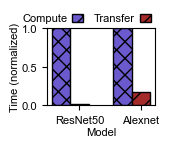

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_dpi(100)


fig.set_size_inches(1.4, 1)

columns = ['model', 'transfer', 'compute']

# ssd, 24 workers, 8 v100
df = pd.read_csv('data.csv', sep='\t', header=None, names=columns)

num_subcategories = 2
transfer_values = df['transfer'].tolist()
compute_values = df['compute'].tolist()

norm_transfer = [transfer_values[i]/compute_values[i] for i in range(len(transfer_values))]
norm_compute = [1 for i in range(len(transfer_values))]

models = df['model'].tolist()
categories = models

bar_width = 0.3
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, norm_compute, bar_width, label='Compute', color='slateblue', hatch="xx", edgecolor="black")
plt.bar(index + 1 * bar_width, norm_transfer, bar_width, label='Transfer', color='brown', hatch="//", edgecolor="black")

# plt.legend(loc="upper center", bbox_to_anchor=(1.15, 1.5), ncol=3, markerfirst=False, columnspacing=1)
plt.legend(loc="upper right", markerfirst=False, columnspacing=1, frameon=False, ncols=2,
            handlelength=1, handletextpad=0.4, bbox_to_anchor=(1.05, 1.32))
plt.annotate("w/ GPEmu", xy=(0.5, 225), xytext=(0.5, 210))

plt.ylim(0,1)
# Adding labels and title
plt.xticks(index + (bar_width * num_subcategories) / 2, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Model', fontsize=fontsize, labelpad=1.5)
plt.ylabel('Time (normalized)', fontsize=fontsize, labelpad=1)
# plt.title('Distributed Cache w/wo Locality-aware',fontsize=fontsize, pad=8)

plt.savefig('speedup.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()
